### MAP556, Ecole Polytechnique, 2023-24

# TP 2 - Variance Reduction

We have a model defined by the relationship $Y = f(X)$.
The objective is to estimate the value $\mathbb{E}\bigl[g(Y)\bigl]$, for a certain function $g$ over the set of outputs $Y$. We assume that $g(Y)$ is square-integrable.

Exercise 1. Control Variables
Black-box models representing input-output systems of numerical codes are often computationally expensive. Let's suppose we have a reduced input-output model $Y_r = f_r(X)$ that is easier to simulate for different input values $X$ than the model $Y = f(X)$, and so that we know the quantity $m_r = \mathbb{E}\bigl[g(Y_r)\bigl]$. Furthermore, we assume $\mathbb{E}\bigl[g(Y_r)^2\bigl]<\infty$.

We denote $(X_i)_{1\leq i\leq n}$ as a sequence of independent copies of the input variable $X$, and we define

$$
 I_n=\frac{1}{n}\sum_{i=1}^n g(f(X_i)),\qquad
 I_n^c = m_r+\frac{1}{n}\sum_{i=1}^n \bigl( g(f(X_i)) - g(f_r(X_i)) \bigr) .
 $$

####  Question 1:
Verify that $I_n$ and $I_n^c$ are unbiased estimators of $\mathbb{E}\bigl[g(Y)\bigl]$, and calculate their variances.

>> ANSWER

We have that:

$$
\mathbb{E}[I_{n}] = \mathbb{E}\left[\frac{1}{n} \sum_{i=1}^{n} g(f(X_{i})) \right] 
$$

$$
\mathbb{E}[I_{n}] = \frac{1}{n} \sum_{i=1}^{n}  \mathbb{E}\left[ g(f(X_{i})) \right] 
$$

As $(X_{i})_{1 \leq i \leq n}$ are i.i.d and $X_{i}\sim X$:

$$
\mathbb{E}[I_{n}] = \mathbb{E}\left[ g(f(X)) \right] = \mathbb{E}\left[ g(Y) \right]  
$$

Hence $I_{n}$ is an unbiased estimator of $\mathbb{E}[g(Y)]$.

Let us now compute its variance:

$$
\mathbb{V}[I_{n}] = \mathbb{V}\left[\frac{1}{n} \sum_{i=1}^{n} g(f(X_{i})) \right]
$$

$$
\mathbb{V}[I_{n}] = \frac{1}{n^{2}}\mathbb{V}\left[\sum_{i=1}^{n} g(f(X_{i})) \right]
$$

As $(X_{i})_{1 \leq i \leq n}$ are i.i.d and $X_{i}\sim X$:

$$
\mathbb{V}[I_{n}] = \frac{1}{n}\mathbb{V}[g(f(X))] = \frac{1}{n}\mathbb{V}[g(Y)] 
$$

Now let us move on to $I_{n}^{c}$:

$$
\mathbb{E}[I_{n}^{c}] = \mathbb{E}\left[ m_{r} + \frac{1}{n}\sum_{i=1}^{n}(g(f(X_{i})) - g(f_{r}(X_{i}))) \right] 
$$

$$
\mathbb{E}[I_{n}^{c}] = m_{r} + \frac{1}{n}\sum_{i=1}^{n}( \mathbb{E}[g(f(X_{i}))] - \mathbb{E}[g(f_{r}(X_{i}))])
$$

As $(X_{i})_{1 \leq i \leq n}$ are i.i.d and $X_{i}\sim X$:

$$
\mathbb{E}[I_{n}^{c}] = m_{r} + \mathbb{E}[g(f(X))] - \mathbb{E}[g(f_{r}(X))]
$$

Using the fact that $Y_{r} = f_{r}(X)$ and $Y = f(X)$:

$$
\mathbb{E}[I_{n}^{c}] = m_{r} + \mathbb{E}[g(Y)] - \mathbb{E}[g(Y_{r})]
$$

As $m_r = \mathbb{E}\bigl[g(Y_r)\bigl]$:

$$
\mathbb{E}[I_{n}^{c}] = \mathbb{E}[g(Y)] 
$$

And thus $I_{n}^{c}$ is an unbiased estimator of $\mathbb{E}[g(Y)]$.

Let us now compute its variance:

$$
\mathbb{V}\left[I_{n}^{c}\right] = \mathbb{V}\left[ m_{r} + \frac{1}{n}\sum_{i=1}^{n}(g(f(X_{i})) - g(f_{r}(X_{i}))) \right] 
$$

$$
\mathbb{V}\left[I_{n}^{c}\right] =  \frac{1}{n^{2}}\mathbb{V}\left[\sum_{i=1}^{n}(g(f(X_{i})) - g(f_{r}(X_{i}))) \right] 
$$

As $(X_{i})_{1 \leq i \leq n}$ are i.i.d and $X_{i}\sim X$:

$$
\mathbb{V}\left[I_{n}^{c}\right] =  \frac{1}{n}\mathbb{V}\left[(g(f(X_{i})) - g(f_{r}(X_{i}))) \right] 
$$

$$
\mathbb{V}\left[I_{n}^{c}\right] = \frac{1}{n} (\mathbb{V}[g(f(X))] + \mathbb{V}[g(f_{r}(X))] - 2 \mathbb{C}\text{ov}(g(f(X)), g(f_{r}(X))))
$$

$$
\mathbb{V}\left[I_{n}^{c}\right] = \frac{1}{n} (\mathbb{V}[g(Y)] + \mathbb{V}[g(Y_{r})] - 2 \mathbb{C}\text{ov}(g(Y), g(Y_{r})))
$$

#### Question 2:

Assuming that the input variables $X$ follow a uniform distribution on $[0,1]$, $f(x)=e^x$, $f_r(x)=1+x$, and $g(y)=y$.

Simulate both estimators and their asymptotic 95% confidence intervals.

Plot the curves of the empirical means $I_n$ and $I_n^c$.

What is the gain in terms of the number of simulations for the estimator $I_n^c$ to achieve the same asymptotic precision as the naive Monte Carlo method?

>> Answer

To simulate the asymptotic $95\%$ confidence intervals we will make use of:

$$
\Delta = 1.96 \sigma
$$

Where $\sigma$ is the standard deviation of our sample.

To compute the gain, let $N$ be the number of iterations and $N^{\star}$ be the number of iterations necessary for the naive Monte Carlo has to achieve the same asymptotic precision as our estimator $I^{c}_{n}$, the gain is therefore:

$$
G = \frac{N^{\star}}{N}
$$

As proved in the previous question, $\sigma \sim \frac{1}{\sqrt{n}}$, hence:

$$
G = \frac{N^{\star}}{N} = \frac{\sigma^{2}}{\sigma_{c}^{2}} = \frac{\mathbb{V}[I^{c}_{c}]}{\mathbb{V}[I_{n}]}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
N = 1000 # Sample size

integers1toN = np.arange(1,N+1) # A vector containing integers from 1 to N

############################################
# Calculate the exact value of m_r
m_r = 1.5
############################################

############################################
# Simulate N samples of values of Y and Y_control
X = np.random.uniform(0,1,N)

Y = np.exp(X)
Y_control = 1 + X
############################################

############################################
# Calculate both estimators and their 
# empirical variances
############################################
Mean_MC = Y.mean()
Variance_MC = Y.var()

Mean_control = m_r + (Y - Y_control).mean()
Variance_control = (Y - Y_control).var()

halfWidthCI95_MC = 1.96 * np.sqrt(Variance_MC / N)
halfWidthCI95_Control = 1.96 * np.sqrt(Variance_control / N)

############################################
# Gain in terms of number of simulations
# for the same precision

control_gain = Variance_MC / Variance_control
############################################

############################################
# For display: exact value of E[g(Y)]
Esp_gY = np.exp(1.)-1.

print("Sample size = %d" %N)
print("Esp_gY = %1.3f \n" %Esp_gY)
print("MC Estimator: mean = %1.3f emp variance = %1.3f"
%(Mean_MC, Variance_MC))
print("CI(95%%) = [%1.3f,%1.3f] \n"
%(Mean_MC-halfWidthCI95_MC, Mean_MC+halfWidthCI95_MC))

print("Control Estimator: mean = %1.3f empirical variance = %1.3f"
%(Mean_control, Variance_control))
print("CI(95%%) = [%1.3f,%1.3f] \n"
%(Mean_control-halfWidthCI95_Control, Mean_control+halfWidthCI95_Control))

print("Gain in number of simulations with control variable: %1.2f" %control_gain)


Sample size = 1000
Esp_gY = 1.718 

MC Estimator: mean = 1.716 emp variance = 0.253
CI(95%) = [1.685,1.747] 

Control Estimator: mean = 1.719 empirical variance = 0.046
CI(95%) = [1.706,1.732] 

Gain in number of simulations with control variable: 5.47


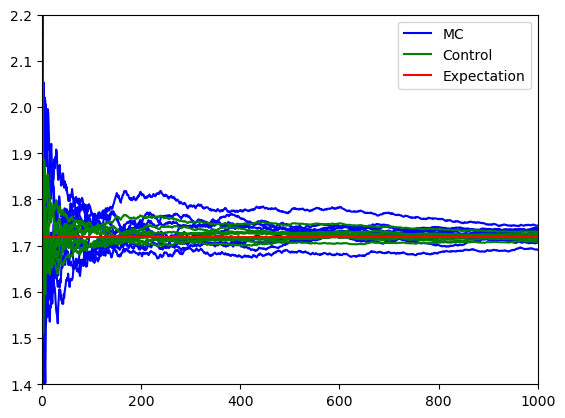

In [3]:
############################################
## Displaying 10 trajectories 
############################################

# Simulating 10 trajectories of the estimators
# I_n and I_n^c
# Expected size of the arrays: M x N
M = 10

X = np.random.uniform(0,1,(M,N))

Y = np.exp(X)
Ycontrol = 1 + X
I_n = np.cumsum(Y, axis = 1) / np.arange(1,N+1)
Ic_n = m_r + (Y - Ycontrol).cumsum(axis = 1) / np.arange(1,N+1)

## Display the 10 trajectories
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(integers1toN, I_n[0], color="b", label="MC")
ax.plot(integers1toN, I_n[1:].T, color="b")

ax.plot(integers1toN, Ic_n[0], color="g", label="Control")
ax.plot(integers1toN, Ic_n[1:].T, color="g")
ax.axhline(Esp_gY, color="r", label="Expectation")

ax.set_xlim(0, N)
ax.set_ylim(1.4, 2.2)
ax.legend(loc="best")
plt.show()

#### Question 3:

Let $(I^j_n)_{1\leq i\leq M}$ and $(I^{c,j}_n)_{1\leq i\leq M}$ be the empirical estimations associated with $M$ independent draws of the two estimators.

Explicitly evaluate $m = \mathbb{E}\bigl[g(Y)\bigl]$ and plot histograms of the errors $(I^j_n - m)_{1 \le j \le M}$ and $(I^{c,j}_n - m)_{1 \le j \le M}$.

$$
\mathbb{E}[g(Y)] = \int_{0}{1}e^{x}dx = e^{1} - e^{0} = e - 1
$$

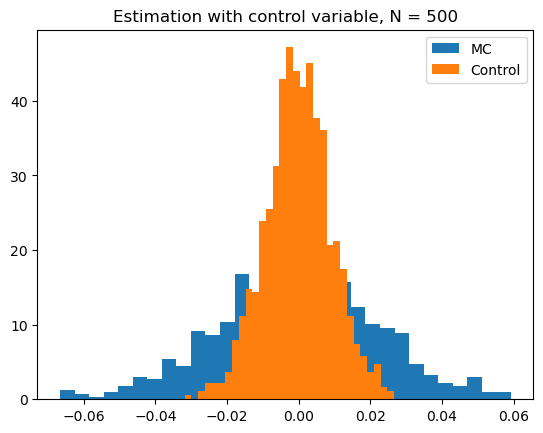

In [4]:
N = 500 # Sample size
M = 1000 # Number of estimator draws

integers1toN = np.arange(1,N+1) # A vector containing integers from 1 to N

Esp_gY = np.exp(1.)-1.
m_r = 1.5

###############
# Simulate the samples of values of Y 
# and Y_control

X = np.random.uniform(0,1,(M,N))

Y = np.exp(X)
Ycontrol = 1 + X

###############

############################################
# Samples of size M for both estimators

I_n = np.cumsum(Y, axis = 1) / integers1toN
Ic_n = (m_r + Y - Ycontrol).cumsum(axis = 1) / integers1toN

I_N = I_n[:,-1]
Ic_N = Ic_n[:,-1]

############################################
## Displaying histograms of errors
## for both estimators

plt.hist(I_N - Esp_gY, density="True", bins=int(np.sqrt(M)), label="MC")
plt.hist(Ic_N - Esp_gY, density="True", bins=int(np.sqrt(M)), label="Control")
plt.title("Estimation with control variable, N = %1.0f" %N)

plt.legend(loc="best")
plt.show()


#### Question 4: Optimal Control Variable

Now, let's consider the estimator

$$
I_n^\lambda = \lambda  m_r + \frac{1}{n}\sum_{i=1}^n \bigl(g(f(X_i)) - \lambda  g(f_r(X_i))\bigr),
\qquad \lambda \in \mathbb R.
$$

Suggest a choice for the parameter $\lambda$.

Plot the trajectories of the empirical means $I_n^\lambda$ obtained with this choice, and then plot the histogram of the errors of this estimator.

>> Answer

$$
\mathbb{V}\left[I_{n}^{\lambda}\right] = \frac{1}{n} (\mathbb{V}[g(Y)] + \lambda^{2}\mathbb{V}[g(Y_{r})] - 2 \lambda \mathbb{C}\text{ov}(g(Y), g(Y_{r})))
$$

Therefore, to minimize the variance we must take:

$$
\lambda^{\star} =\frac{\mathbb{C}\text{ov}(g(Y), g(Y_{r}))}{\mathbb{V}[g(Y_{r})]} 
$$

We can therefore estimate the best parameter by an estimation of the covariance and the variance.

In [5]:
############################################
## Estimating optimal lambda from a small
## number of simulations
############################################
n = 100
X = np.random.rand(n)
Y = np.exp(X)
Ycontrol = 1 + X

## Empirical optimal lambda

lambda_opt = np.cov(Y, Ycontrol)[0,1] / np.var(Ycontrol)

print("Optimal lambda = %1.3f" %lambda_opt)

Optimal lambda = 1.676


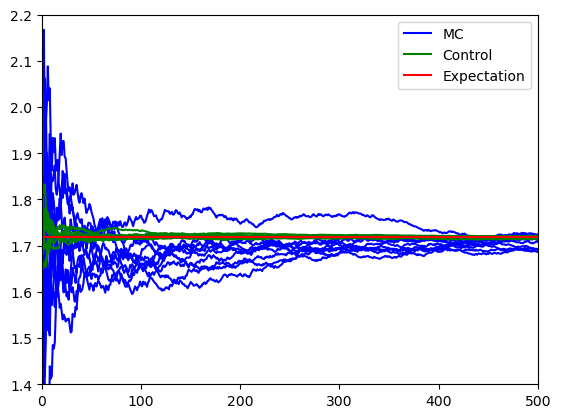

In [6]:
#############################################
### For histograms: M x N draws
#############################################
M = 1000
N = 500
integers1toN = np.arange(1,N+1)

X = np.random.random((M,N))

Y = np.exp(X)
Ycontrol = 1 + X

#############################################
### Displaying the first 10 trajectories
#############################################

I_n = np.cumsum(Y[0:10,:], axis=1) / integers1toN
Ic_n = np.cumsum((lambda_opt*m_r + Y - lambda_opt*Ycontrol)[0:10,:], axis=1) / integers1toN

## Display the first 10 trajectories
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(integers1toN, I_n[0], color="b", label="MC")
ax.plot(integers1toN, I_n[1:].T, color="b")

ax.plot(integers1toN, Ic_n[0], color="g", label="Control")
ax.plot(integers1toN, Ic_n[1:].T, color="g")
ax.axhline(Esp_gY, color="r", label="Expectation")

ax.set_xlim(0, N)
ax.set_ylim(1.4, 2.2)
ax.legend(loc="best")
plt.show()

In [7]:

############################################
# Calculate both estimators I_N and I_N control and their
# empirical variances

# Mean_MC = np.mean(I_n[:,-1])
# Variance_MC = np.var(I_n[:,-1])

# Mean_control = np.mean(Ic_n[:,-1])
# Variance_control = np.var(Ic_n[:,-1])

Mean_MC = np.mean(Y[0,:])
Variance_MC = np.var(Y[0,:])

Mean_control = np.mean((lambda_opt*m_r + Y - lambda_opt*Ycontrol)[0,:])
Variance_control = np.var((lambda_opt*m_r + Y - lambda_opt*Ycontrol)[0,:])

halfWidthCI95_MC = np.sqrt(Variance_MC / N)*1.96
halfWidthCI95_Control = np.sqrt(Variance_control / N)*1.96

control_gain = Variance_MC/Variance_control

print("Sample size = %d" %N)
print("Esp_gY = %1.3f \n" %Esp_gY)
print("MC Estimator: mean = %1.3f  empirical variance = %1.3f" \
      %(Mean_MC, Variance_MC))
print("CI(95%%) = [%1.3f,%1.3f] \n" \
      %(Mean_MC-halfWidthCI95_MC, Mean_MC+halfWidthCI95_MC))

print("Control Estimator: mean = %1.4f  empirical variance = %1.3f" \
      %(Mean_control, Variance_control))
print("CI(95%%) = [%1.3f,%1.3f] \n" \
      %(Mean_control-halfWidthCI95_Control, Mean_control+halfWidthCI95_Control))

print("Gain in number of simulations with control variable: %1.2f" %control_gain)

Sample size = 500
Esp_gY = 1.718 

MC Estimator: mean = 1.692  empirical variance = 0.227
CI(95%) = [1.650,1.734] 

Control Estimator: mean = 1.7154  empirical variance = 0.004
CI(95%) = [1.710,1.721] 

Gain in number of simulations with control variable: 57.86


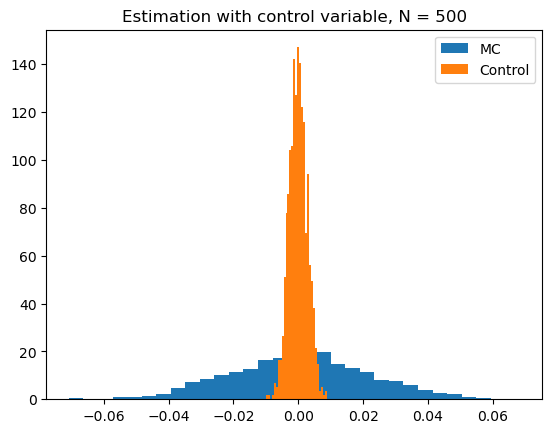

In [8]:
#############################################
### For the histogramms: evaluate the 
## errors for both estimators I_N and I_N control
#############################################

error_N = Y.mean(axis = 1) - Esp_gY
error_control_N = (lambda_opt*m_r + Y - lambda_opt*Ycontrol).mean(axis = 1) - Esp_gY

plt.hist(error_N, density="True", bins=int(np.sqrt(M)), label="MC")

plt.hist(error_control_N, density="True", bins=int(np.sqrt(M)), label="Control")

plt.title("Estimation with control variable, N = %1.0f" %N)

plt.legend(loc="best")
plt.show()

Comments: With the histogram plot it is clear that the error with the control variable under the optimal setup improves significantly our estimator.

### Exercise 2. Antithetic Sampling and Stratification Methods
We assume that the input variables $X$ follow a uniform distribution between $-1$ and $+1$. We are in the situation where $f(x)=e^x$, and $g(y)=y$, and we want to estimate $\mathbb{E}\bigl[g(Y)\bigl]= \mathbb{E}\bigl[e^X\bigl]$.


#### Question 1: Basic Monte Carlo Method

Let $I_n$ be the empirical mean of $n$ independent copies of $X$.

Verify that we have $\mathbb{E}\bigl[e^X\bigl] = \sinh(1)\simeq 1.18$, and $\mathbb{V}\text{ar}(e^X)= \frac{1}{2} (1-e^{-2})\simeq 0.43$.

Plot the curves of the empirical means obtained from multiple realizations and compare them with the desired quantity.





>> Answer

We have that:

$$
\mathbb{E}[e^{X}] = \int_{-1}^{1}\frac{1}{2}e^{x}dx = \frac{1}{2}(e^{1} - e{-1}) = \sinh(1)
$$

$$
\mathbb{V}\text{ar}[e^{X}] = \int_{-1}^{1}\frac{1}{2}e^{2x}dx - \frac{1}{4}(e^{2} - 2 + e^{-2}) = \frac{1}{4}(e^{2} - e^{-2}) - \frac{1}{4}(e^{2} - 2 + e^{-2}) = \frac{1}{2}(1 - e^{-2})
$$

As desired.

In [9]:
# Constants to be used for the rest of the exercise

N = 1000 # Sample size
integers1toN = np.arange(1,N+1) # A vector containing integers from 1 to N

Esp_gY = np.sinh(1.0)
Var_gY = (1.0 - np.exp(-2.))/2.

In [10]:
############################################
# Complete with N draws from the uniform distribution [-1,1]
# and draws of Y = exp(X)
X = np.random.uniform(-1,1,N)
Y = np.exp(X)
############################################

############################################
# Store in 'mean' the MC estimation of E[g(Y)],
# in 'var' the empirical variance, and in 'halfWidthCI'
# the half width of the asymptotic 95% confidence interval for E[g(Y)]
mean = Y.mean()
var = Y.var()
halfWidthCI = 1.96 * np.sqrt(var / N)
############################################

print("MC Estimator \n")

print("Esp_gY = %1.3f Var_gY = %1.3f" %(Esp_gY, Var_gY))
print("mean = %1.3f  var = %1.3f" %(mean,var))
print("95%% confidence interval for E[g(Y)] = [ %1.3f , %1.3f ] \n" %(mean - halfWidthCI, mean + halfWidthCI))
print("Relative error = %1.3f" %(halfWidthCI/mean))



MC Estimator 

Esp_gY = 1.175 Var_gY = 0.432
mean = 1.184  var = 0.438
95% confidence interval for E[g(Y)] = [ 1.143 , 1.225 ] 

Relative error = 0.035


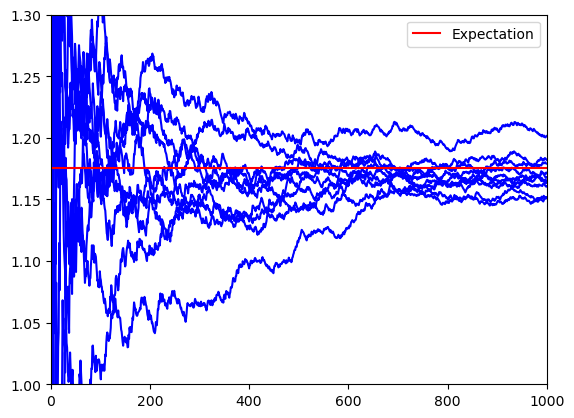

In [11]:
M = 10 # number of realizations of empirical means

############################################
# Complete with N draws from the uniform distribution [-1,1]
# and antithetic draws
X = np.random.uniform(-1,1,(M,N))
Y = np.exp(X)
I_n = np.cumsum(Y, axis = 1) / integers1toN
############################################

# Displaying trajectories
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, I_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Expectation")
ax.legend(loc="best")
plt.show()


Comments: We see that there is indeed a convergence to the theoretical expected value.

#### Question 2: Antithetic Sampling

Verify that $(f(u)-f(v))(f(-u)-f(-v))\leq 0$, for all $(u,v)\in [-1,1]$, and deduce a antithetic sampling technique based on simulating $n$ uniform variables on $[-1,1]$.

Let $I^{\prime}_n$ be the corresponding empirical estimator.

Plot the curves of the empirical means obtained.

What is the gain in terms of the number of simulations for this estimator, for the same asymptotic accuracy as the naive Monte Carlo method?

>> Answer

We have that as $f: x\mapsto e^{x}$, a strictly increasing function ($f^{\prime}(x) > 0$). 

Let $(u,v)\in[-1,1]^{2}$, we assume without loss of generality that $u\leq v$, hence $-v \leq -u$. Using the fact that $f$ is strictly increasing:

$$
f(u) - f(v) \leq 0 \quad \text{and} \quad f(-u) - f(-v) \geq 0
$$

Thus:

$$
(f(u) - f(v))(f(-u) - f(-v)) \leq 0
$$

As desired.

Taking advantage of the symmetry of $X\sim U([-1,1])$, we have that $-X \sim U([-1,1])$. We can therefore propose the estimator:

$$
I_{n}^{\prime} = \frac{1}{n}\sum_{i=1}^{n}\frac{g(f(X_{i})) + g(f(-X_{i}))}{2}
$$

We confirm that:

$$
\mathbb{E}[I_{n}^{\prime}] = \mathbb{E}\left[\frac{1}{n}\sum_{i=1}^{n}\frac{g(f(X_{i})) + g(f(-X_{i}))}{2}\right] 
$$

As our $(X_{i})_{i\in\{1,\dots,n\}}$ are i.i.d:

$$
\mathbb{E}[I_{n}^{\prime}] = \frac{\mathbb{E}[g(f(X))] + \mathbb{E}[g(f(-X))]}{2} 
$$

And since $X\sim - X$:

$$
\mathbb{E}[I_{n}^{\prime}] = \frac{\mathbb{E}[g(f(X))] + \mathbb{E}[g(f(X))]}{2} = \mathbb{E}[g(f(X))]
$$

As desired.

Now we if we compute the variance of our new estimator:

$$
\mathbb{V}\text{ar}[I_{n}^{\prime}] = \mathbb{V}\text{ar}\left[\frac{1}{n}\sum_{i=1}^{n}\frac{g(f(X_{i})) + g(f(-X_{i}))}{2}\right] 
$$

As our $(X_{i})_{i\in\{1,\dots,n\}}$ are i.i.d:

$$
\mathbb{V}\text{ar}[I_{n}^{\prime}] = \frac{1}{4n}  \mathbb{V}\text{ar}[g(f(X)) + g(f(-X))]
$$

Using that $-X \sim X$:

$$
\mathbb{V}\text{ar}[I_{n}^{\prime}] = \frac{1}{2n} (\mathbb{V}\text{ar}[g(f(X))] + \mathbb{C}\text{ov}[g(f(X)), g(f(-X))])
$$

Let us now compute the covariance:

$$
\mathbb{C}\text{ov}[g(f(X)), g(f(-X))] = \mathbb{E}[g(f(X))g(f(-X))] - \mathbb{E}[g(f(X))]\mathbb{E}[g(f(-X))]
$$

$$
\mathbb{C}\text{ov}[g(f(X)), g(f(-X))] = \int_{-1}^{1}\frac{1}{2}e^{x}e^{-x}dx - \mathbb{E}[g(f(X))]^{2} = 1 - \mathbb{E}[g(f(X))]^{2}
$$

Thus:

$$
\mathbb{V}\text{ar}[I_{n}^{\prime}] = \frac{1}{2n} (\mathbb{V}\text{ar}[g(f(X))] + 1 - \mathbb{E}[g(f(X))]^{2})
$$

$$
\mathbb{V}\text{ar}[I_{n}^{\prime}] = \frac{1}{2n} (\mathbb{V}\text{ar}[g(f(X))] + 1 - \sinh(1)^{2})
$$

Since $\sinh(1) \geq 1$:

$$
\mathbb{V}\text{ar}[I_{n}^{\prime}] \leq \frac{1}{2n} \mathbb{V}\text{ar}[g(f(X))] = \frac{1}{2}\mathbb{V}\text{ar}[I_{n}]
$$

In [12]:
############################################
# Complete with N draws from the uniform distribution [-1,1]
# and antithetic draws
X = np.random.uniform(-1,1,N)
Z = (np.exp(X) + np.exp(-X)) / 2
#
############################################

############################################
# Complete with the calculation of the antithetic estimator
mean = Z.mean()
var = Z.var()
halfWidthCI = 1.96 * np.sqrt(Z.var()/np.sqrt(N))
############################################

print("Antithetic Estimator \n")

print("Esp_gY = %1.3f" %(Esp_gY))
print("I_prime_mean = %1.3f  empirical variance = %1.3f" %(mean, var))
print("95%% Confidence Interval for E[g(Y)] = [ %1.3f , %1.3f ] \n" %(mean - halfWidthCI, mean + halfWidthCI))
print("Relative error = %1.3f" %(halfWidthCI/mean))
print("gain in number of simulations compared to MC: %1.2f" %(Var_gY/var))



Antithetic Estimator 

Esp_gY = 1.175
I_prime_mean = 1.188  empirical variance = 0.028
95% Confidence Interval for E[g(Y)] = [ 1.130 , 1.246 ] 

Relative error = 0.049
gain in number of simulations compared to MC: 15.52


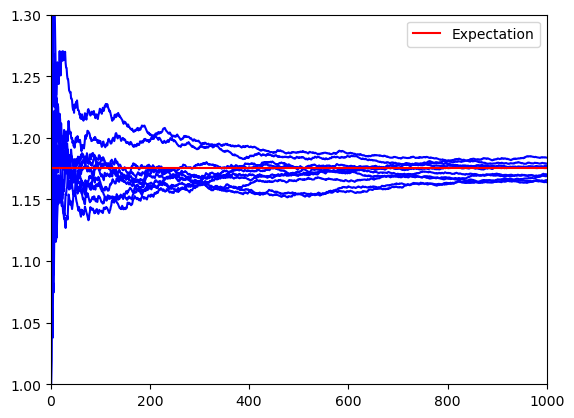

In [13]:
############################################
## Empirical mean trajectories
############################################

############################################
# Evaluate M trajectories of the empirical estimator I'_n
X = np.random.uniform(-1,1,(M,N))
Z = (np.exp(X) + np.exp(-X))/2

############################################
# Complete with the calculation of
# antithetic estimator trajectories
integers1toN = np.arange(1,N+1) 
I_prime_n = np.cumsum(Z, axis = 1) / integers1toN
############################################

# Displaying the estimator trajectories
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, I_prime_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Expectation")
ax.legend(loc="best")
plt.show()


Comments: We see that by using the antithetic sampling we can further improve the gain, as expected from the theoretical results.

#### Question 3: Proportional Stratification
Propose a proportional stratification technique based on simulating uniform variables on $[-1,0]$ and uniform variables on $[0,1]$.

Let $J_n$ be the corresponding estimator. Plot the estimator trajectories as a function of $n$. Does this estimator satisfy the Central Limit Theorem (CLT)? What is the gain in terms of the number of simulations for this estimator, for the same asymptotic accuracy as the naive Monte Carlo method?

Can we explicitly calculate $\mathbb{V}\text{ar}(J_n)$? (see question 5)

>> Answer

Here we propose proportinal stratification technique estimator, the stratifications are, as suggested, $I_{1} = [-1,0]$ and $I_{2} = [0,1]$. Since $X\sim U([-1,1])$, the random variable $f(X)|X\in[-1,0]\sim U([-1,0])$, and, similarly, $f(X)|X\in[0,1]\sim U([0,1])$. We can therefore propose the following estimators. Let $n,n_{1}, n_{2} \in\mathbb{N}$ such that $n_{1} + n_{2} = n$:

$$
J_{n} = \frac{1}{2}\left(\frac{1}{n_{1}} \sum_{i = 0}^{n_{1}} g(f(X_{1,i})) + \frac{1}{n_{2}} \sum_{i = 0}^{n_{2}} g(f(X_{2,i}))\right)
$$

Where $X_{1,i}\sim U([-1,0])$ and $X_{2,i}\sim U([0,1])$. For now we will stick to the most simple split of $n_{1} = n_{2} = \frac{n}{2}$ (we take $n$ even).  

Let $n\in2\mathbb{Z}$. Let $(X_{1,i})_{\{1,\dots,n/2\}}$, i.i.d, and $((X_{2,i})_{\{1,\dots,n/2\}})$, i.i.d, such that $\forall i \in \{1,\dots,N/2\}$ we have $X_{1,i}\sim X_{1} \sim \text{U}([-1,0])$ and $X_{2,i}\sim X_{2} \sim \text{U}([0,1])$. We also have that all variables are independant from each other. We propose the following estimator:

$$
J_{n} = \frac{1}{n} \sum_{i = 0}^{n/2} (g(f(X_{1,i})) + g(f(X_{2,i}))) 
$$

We verify that it is unbiased:

$$
\mathbb{E}[J_{n}] = \mathbb{E}\left[ \frac{1}{n} \sum_{i = 0}^{n/2} (g(f(X_{1,i})) + g(f(X_{2,i}))) \right]
$$

Using that the variables are i.i.d with respect to their stratification:

$$
\mathbb{E}[J_{n}] = \frac{1}{2} (\mathbb{E}[g(f(X_{1}))] + \mathbb{E}[g(f(X_{2}))])
$$

$$
\mathbb{E}[J_{n}] = \frac{1}{2} \left[\int_{-1}^{0}g(f(x))dx + \int_{0}^{1}g(f(x))dx\right] 
$$

$$
\mathbb{E}[J_{n}] = \int_{-1}^{1}\frac{1}{2}g(f(x))dx  = \mathbb{E}[g(f(X))]
$$

As desired.

Now let us explicitely compute the variance of the estimator:

$$
\mathbb{V}\text{ar}[J_{n}] = \mathbb{V}\text{ar}\left[ \frac{1}{n} \sum_{i = 0}^{n/2} (g(f(X_{1,i})) + g(f(X_{2,i}))) \right]
$$

Using that the variables are i.i.d in their respective stratification and independent from each other.

$$
\mathbb{V}\text{ar}[J_{n}] = \frac{1}{2n} (\mathbb{V}\text{ar}[g(f(X_{1}))]+\mathbb{V}\text{ar}[g(f(X_{2}))])
$$

Let us compute for each random variable:

$$
\mathbb{V}\text{ar}[g(f(X_{1}))] = \int_{-1}^{0}e^{2x}dx - \left(\int_{-1}^{0}e^{x}dx\right)^{2} = \frac{1}{2}(1 - e^{-2}) - (1-e^{-1})^{2}
$$

$$
\mathbb{V}\text{ar}[g(f(X_{2}))] = \int_{0}^{1}e^{2x}dx - \left(\int_{0}^{1}e^{x}dx\right)^{2} = \frac{1}{2}(e^{2} - 1) - (e-1)^{2}
$$

Which is the same result as in question 5.

Furthermore, it also satisfies CLT as each stratification corresponds to the the estimator of the mean of a series of i.i.d random variables. Hence the distribution of the errors of each stratification will converge to a gaussian distribution with its respective variance. As the two gaussians will be independent, their sum will also be a gaussian, hence the erros of our estimator will as well converge to a gaussian, satisfying the CLT.

Since it will be useful in further questions, let us study the CLT for a given stratification that is not symmetrical. Let $r \in (0,1)$ such that $n_{1} = rn$ and $n_{2} = (1-r)n$.

By the CLT we will have that:

$$
\left(\frac{1}{n_{1}}\sum_{i = 1}^{n_{1}}X_{1,i} - \mathbb{E}[g(f(X_{1}))]\right) \sim \mathcal{N}\left(0,\frac{\mathbb{V}\text{ar}[g(f(X_{1}))]}{n_{1}}\right)
$$

$$
\left(\frac{1}{n_{2}}\sum_{i = 1}^{n_{1}}X_{2,i} - \mathbb{E}[g(f(X_{2}))]\right) \sim \mathcal{N}\left(0,\frac{\mathbb{V}\text{ar}[g(f(X_{2}))]}{n_{2}}\right)
$$

Since, as previously computed, $\mathbb{E}[g(f(X_{1}))] + \mathbb{E}[g(f(X_{2}))] = \mathbb{E}[g(f(X))]$:

$$
J_{n} - \mathbb{E}[g(f(X))] = \frac{1}{2}\left( \left(\frac{1}{n_{1}}\sum_{i = 1}^{n_{1}}X_{1,i} - \mathbb{E}[g(f(X_{1}))]\right) + \left(\frac{1}{n_{2}}\sum_{i = 1}^{n_{1}}X_{2,i} - \mathbb{E}[g(f(X_{2}))]\right) \right)\sim \mathcal{N}\left(0,\frac{\mathbb{V}\text{ar}[g(f(X_{2}))]}{4n_{2}} + \frac{\mathbb{V}\text{ar}[g(f(X_{1}))]}{4n_{1}}\right)
$$

Given a more detailed proof of the fact that $J_{n}$ follows the CLT in the general case. It also agrees with the variance obtained in the specific case of $r=\frac{1}{2}$.

In [14]:
# Proportionnal stratification (we will take N even)
N1 = int(N/2)
N2 = N1

############################################
# Complete with N1 and N2 draws of conditional distributions
# on strata
X1 = np.random.uniform(-1,0,N1)
X2 = np.random.uniform(0,1,N2)
############################################

############################################
# Stratified estimator
J_N = (np.exp(X1).mean() + np.exp(X2).mean())/2

############################################
# We evaluate the asymptotic variance through simulation
# of the estimator J_N
############################################

var = (np.exp(X1).var() + np.exp(X2).var()) / 2

halfWidthCI = 1.96 * np.sqrt(var / N)  # because J_N satisfies a CLT
relativeError = halfWidthCI / J_N

#######
print("Estimator by proportionnal stratification \n")

print("E[g(Y)] = %1.3f Var[g(Y)] = %1.3f" %(Esp_gY, Var_gY))
print("J_N = %1.3f Estimated Variance  = %1.3f" %(J_N, var))
print("CI = [%1.3f,%1.3f] \n" %(J_N - halfWidthCI, J_N + halfWidthCI))
print("Relative Error = %1.3f" %relativeError)

print("Savings in the number of simulations compared to MC: %1.2f" %(Var_gY/var))

Estimator by proportionnal stratification 

E[g(Y)] = 1.175 Var[g(Y)] = 0.432
J_N = 1.172 Estimated Variance  = 0.132
CI = [1.149,1.194] 

Relative Error = 0.019
Savings in the number of simulations compared to MC: 3.27


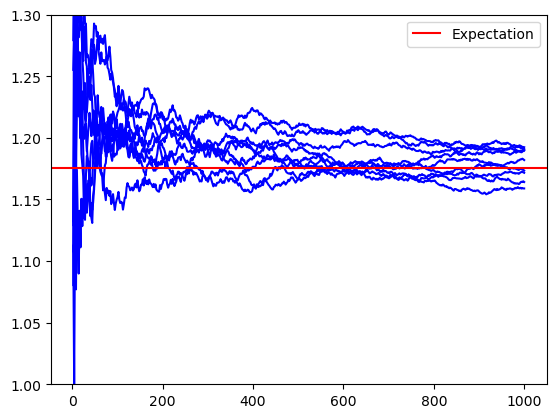

In [15]:
############################################
## Trajectories of the stratified estimator J_n
## for n = 2, 4, ..., N
############################################
M = int(10)

############################################
# Complete with M x N1 and M x N2 draw
# of the conditionnal laws on strata
X1 = np.random.uniform(-1,0,(M,N))
X2 = np.random.uniform(0,1,(M,N))
############################################

J_n = np.zeros((M, int(N/2)))

############################################
# Complete with the calculus of the stratified
# estimator for n@ 2,4,...,N

for n in np.arange(2, N+2, 2):
    n1 = n // 2
    J_n[:, n1-1] = (np.exp(X1)[:,:n1+1].mean(axis = 1) + np.exp(X2)[:,:n1+1].mean(axis = 1))/2

############################################
# Displaying the trajectories of the stratified estimator
## for n = 2, 4, ..., N

evenIntegers1toN = np.arange(2, N+2, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(evenIntegers1toN, J_n[1:10, :].T, color="b")

ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Expectation")
ax.legend(loc="best")
plt.show()


#### Question 4: Non-Proportional Stratification (Optional)

Propose a stratification technique based on simulating a proportion $n_1=rn$ of uniform variables on $[-1,0]$, and $n_2=(1-r)n$ of uniform variables on $[0,1]$, with $r \in (0,1)$ such that $n_1$ and $n_2$ are integers.

Plot the trajectories of these estimators as a function of $n$ for various values of $r$.

>> Answer

Such stratification technique was proposed in the previous Question when discussing the more general case for the CLT. Let us rewrite the equations obtained.

$$
J_{n} = \frac{1}{2}\left(\frac{1}{n_{1}} \sum_{i = 0}^{n_{1}} g(f(X_{1,i})) + \frac{1}{n_{2}} \sum_{i = 0}^{n_{2}} g(f(X_{2,i}))\right)
$$

An unbiased estimator, with:

$$
J_{n} - \mathbb{E}[g(f(X))] = \frac{1}{2}\left( \left(\frac{1}{n_{1}}\sum_{i = 1}^{n_{1}}X_{1,i} - \mathbb{E}[g(f(X_{1}))]\right) + \left(\frac{1}{n_{2}}\sum_{i = 1}^{n_{1}}X_{2,i} - \mathbb{E}[g(f(X_{2}))]\right) \right)\sim \mathcal{N}\left(0,\frac{\mathbb{V}\text{ar}[g(f(X_{2}))]}{4n_{2}} + \frac{\mathbb{V}\text{ar}[g(f(X_{1}))]}{4n_{1}}\right)
$$

By replacing $r$:

$$
J_{n} - \mathbb{E}[g(f(X))] = \frac{1}{2}\left( \left(\frac{1}{n_{1}}\sum_{i = 1}^{n_{1}}X_{1,i} - \mathbb{E}[g(f(X_{1}))]\right) + \left(\frac{1}{n_{2}}\sum_{i = 1}^{n_{1}}X_{2,i} - \mathbb{E}[g(f(X_{2}))]\right) \right)\sim \mathcal{N}\left(0,\frac{1}{4n} \left(\frac{\mathbb{V}\text{ar}[g(f(X_{2}))]}{(1-r)} + \frac{\mathbb{V}\text{ar}[g(f(X_{1}))]}{r}\right)\right)
$$

Non-Proportional Stratification Estimator, r = 0.80 

E[g(Y)] = 1.1752 Var[g(Y)] = 0.4323
J_N = 1.2088  var*N = 0.3210
CI = [0.0984,2.3192] 

Relative Error = 0.9186
Savings in the number of simulations compared to MC : 1.3470


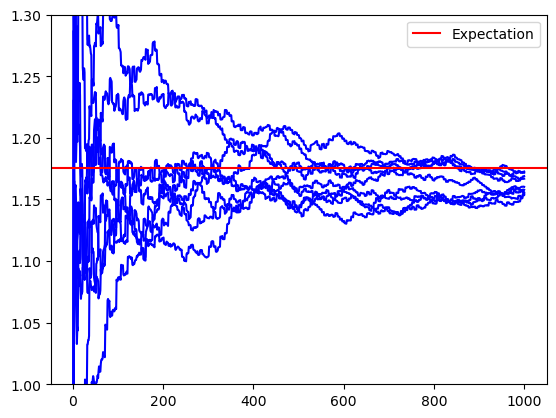

Non-Proportional Stratification Estimator, r = 0.40 

E[g(Y)] = 1.1752 Var[g(Y)] = 0.4323
J_N = 1.1788  var*N = 0.1208
CI = [0.4977,1.8599] 

Relative Error = 0.5778
Savings in the number of simulations compared to MC : 3.5798


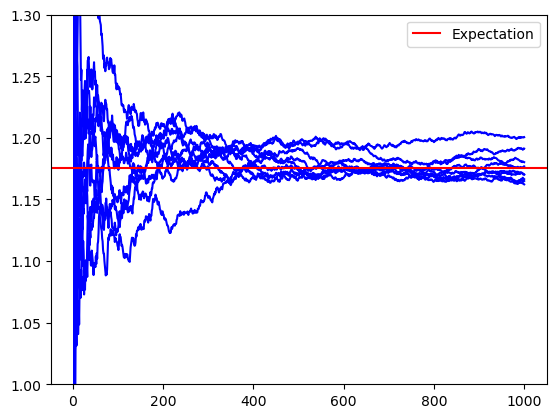

Non-Proportional Stratification Estimator, r = 0.20 

E[g(Y)] = 1.1752 Var[g(Y)] = 0.4323
J_N = 1.1851  var*N = 0.1189
CI = [0.5093,1.8610] 

Relative Error = 0.5702
Savings in the number of simulations compared to MC : 3.6364


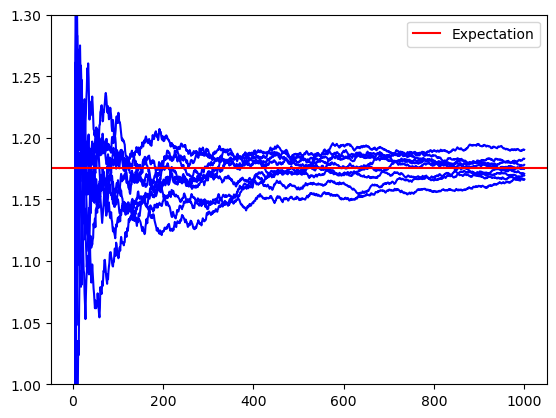

In [16]:
# Non-Proportional Stratification

def nonProportionalStratification(r):
    N1 = int(N * r)
    N2 = int(N - N1)
    
    ################
    # Complete with N1 and N2 draws
    # of conditional distributions on strata
    X1 = np.random.uniform(-1,0,N1)
    X2 = np.random.uniform(0,1,N2)
    ################
    
    ################
    # Stratified estimator
    J_N = (np.exp(X1).mean() + np.exp(X2).mean())/2
    
    ############################################################
    # Evaluate the variance of the estimator J_N through simulation
    var = (1/4) * (np.exp(X1).var()/r + np.exp(X2).var()/(1-r))
    
    halfWidthCI = 1.96 * np.sqrt(var)
    
    relativeError = halfWidthCI / J_N
    
    print("Non-Proportional Stratification Estimator, r = %1.2f \n" %r)
    
    print("E[g(Y)] = %1.4f Var[g(Y)] = %1.4f" %(Esp_gY, Var_gY))
    print("J_N = %1.4f  var*N = %1.4f" %(J_N, var))
    print("CI = [%1.4f,%1.4f] \n" %(J_N - halfWidthCI, J_N + halfWidthCI))
    
    print("Relative Error = %1.4f" %relativeError)
    print("Savings in the number of simulations compared to MC : %1.4f" %(Var_gY/var))
    
    ############################################
    ## Trajectories of the stratified estimator for n=1,..,N
    ############################################
    M = 10
    
    #####################
    # Complete with M x N1 and M x N2 draws
    # of conditionnal laws on strata
    X1 = np.random.uniform(-1,0,(M,N))
    X2 = np.random.uniform(0,1,(M,N))
    
    Y1 = np.exp(X1); Y2 = np.exp(X2)
    
    J_n = np.zeros((M, N))
    
    #####################
    # Complete with the calculus of the stratified
    # estimator for different values of n
    for n in np.arange(int(1/r), N):
        n1 = int(n * r)
        n2 = n - n1
        J_n[:, n] = (Y1[:,:n1+1].mean(axis = 1) + Y2[:,:n2+1].mean(axis = 1))/2
        
    ############################################
    # Display the trajectories
    integers1toN = np.arange(1, N+1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(integers1toN, J_n[1:10, :].T, color="b")
    
    ax.set_ylim(1.0, 1.3)
    ax.axhline(Esp_gY, color="r", label="Expectation")
    ax.legend(loc="best")
    plt.show()

nonProportionalStratification(0.8)
nonProportionalStratification(0.4)
nonProportionalStratification(0.2)


####  Question 5: Optimal stratification on both strata$(S_1,S_2)=([-1,0],[0,1])$ (Optional)

Calculate the values of the parameters
$$
\sigma_1^2:=\mathbb{E}\bigl[e^{2X}~|~X\in[-1,0]\bigl] - \mathbb{E}\bigl[e^{X}~|~X\in[-1,0]\bigl]^2\\
\sigma_2^2:=\mathbb{E}\bigl[e^{2X}~|~X\in[0,1]\bigl] - \mathbb{E}\bigl[e^{X}~|~X\in[0,1]\bigl]^2
$$
and propose an optimal stratification technique.
Simulate the empirical estomator associated and plot its trajectories.


>> Answer

As previously computed in Question 3:

$$
\mathbb{V}\text{ar}[g(f(X_{1}))] = \int_{-1}^{0}e^{2x}dx - \left(\int_{-1}^{0}e^{x}dx\right)^{2} = \frac{1}{2}(1 - e^{-2}) - (1-e^{-1})^{2}
$$

$$
\mathbb{V}\text{ar}[g(f(X_{2}))] = \int_{0}^{1}e^{2x}dx - \left(\int_{0}^{1}e^{x}dx\right)^{2} = \frac{1}{2}(e^{2} - 1) - (e-1)^{2}
$$

We recall that:

$$
J_{n} - \mathbb{E}[g(f(X))] = \frac{1}{2}\left( \left(\frac{1}{n_{1}}\sum_{i = 1}^{n_{1}}X_{1,i} - \mathbb{E}[g(f(X_{1}))]\right) + \left(\frac{1}{n_{2}}\sum_{i = 1}^{n_{1}}X_{2,i} - \mathbb{E}[g(f(X_{2}))]\right) \right)\sim \mathcal{N}\left(0,\frac{1}{4n} \left(\frac{\mathbb{V}\text{ar}[g(f(X_{2}))]}{(1-r)} + \frac{\mathbb{V}\text{ar}[g(f(X_{1}))]}{r}\right)\right)
$$

Hence we can choose $r$ to minimize the asymptotical variance by minimizing the variance of the gaussian. By taking the first derivative we obtain two candidates $\frac{\sigma_{1}}{\sigma_{1}+\sigma_{2}}$ and $\frac{\sigma_{1}}{\sigma_{2} - \sigma_{1}}$, but only the first consist of a point of minimum (intuitively we can easily see that the second is not valid by taking for example $\sigma_{1} = \sigma_{2}$).

$$
r^{\star} = \frac{\sigma_{1}}{\sigma_{1}+\sigma_{2}}
$$

In [17]:
## Explicit Calculation of sigma_1 and sigma_2
sigma_1 = np.sqrt(0.5 * (1. - np.exp(-2.)) - (1. - np.exp(-1.))**2)
sigma_2 = np.sqrt(0.5 * (np.exp(2.) - 1.) - (np.exp(1.) - 1.)**2)

############################################
## Compute the optimal N1
r = sigma_1 / (sigma_1 + sigma_2)

N1 = int(N * r)
N2 = int(N - N1)

############################################
## Simulation of the non-proportional 
## stratification estimator with optimal N1
##
## This is the same code as in Question 4: we could directly call
## the nonProportionalStratification(r) function
## The only difference in the code below is that we use
## the explicit variance of the stratified estimator instead of estimating it.
X1 = np.random.uniform(-1, 0, N1)
X2 = np.random.uniform(0, 1, N2)

############################################
# Stratified estimator

J_N = (np.exp(X1).mean() + np.exp(X2).mean())/2

############################################
## Compute the variance of the optimal J_N estimator
## We can use the explicit expression of the variance of J_N
var = (1/4)*(np.exp(X1).var() / r + np.exp(X2).var() / (1-r))


halfWidthCI = 1.96 * np.sqrt(var / N)
relativeError = halfWidthCI / J_N

############################################
print("Estimator by optimal non-proportional stratification, r_optimal = %1.3f" % r)

print("E[g(Y)] = %1.3f Var[g(Y)] = %1.3f" % (Esp_gY, Var_gY))
print("J_mean = %1.3f  theoretical_variance = %1.3f" % (J_N, var))
print("CI = [%1.3f,%1.3f] \n" % (J_N - halfWidthCI, J_N + halfWidthCI))

print("Relative Error = %1.3f" % relativeError)
print("Savings in the number of simulations compared to MC: %1.2f" % (Var_gY / var))


Estimator by optimal non-proportional stratification, r_optimal = 0.269
E[g(Y)] = 1.175 Var[g(Y)] = 0.432
J_mean = 1.180  theoretical_variance = 0.111
CI = [1.159,1.200] 

Relative Error = 0.018
Savings in the number of simulations compared to MC: 3.90


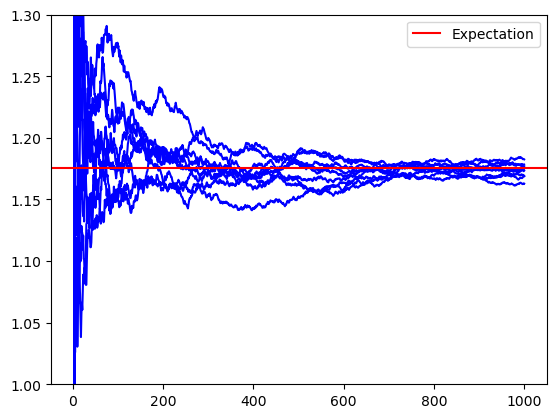

In [18]:
############################################
# Complete the trajectories of the stratified estimator
# for n = 1, .., N
J_n = np.zeros((M, N))

X1 = np.random.uniform(-1,0,(M,N))
X2 = np.random.uniform(0,1,(M,N))

Y1 = np.exp(X1); Y2 = np.exp(X2)

for n in np.arange(int(1 / r), N):
    n1 = int(n * r)
    n2 = n - n1
    J_n[:, n] = (Y1[:,:n1+1].mean(axis = 1) + Y2[:,:n2+1].mean(axis = 1))/2

############################################
# Displaying the trajectories
integers1toN = np.arange(1, N + 1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, J_n[1:10, :].T, color="b")

ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Expectation")
ax.legend(loc="best")
plt.show()


Comments: We see that we achieve a better gain under the optimal value of $r$.